# Simple linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# data is random and made for simple linear regression

np.random.seed(42)

# Generate random data
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Slope (Coefficient): 2.9197294629921116
Intercept: 5.285826638917127
Mean Squared Error (MSE): 2.6147980548680105
R² Score: 0.9686345415489115


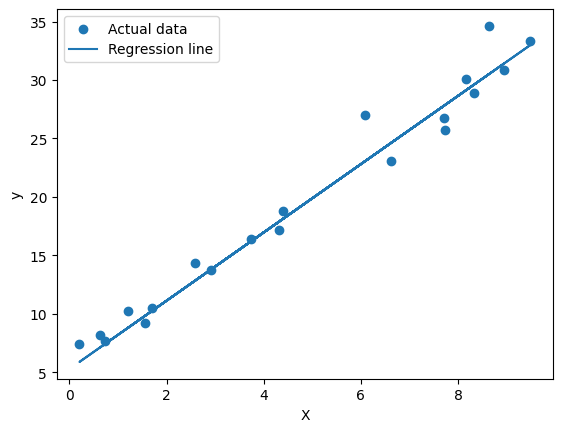

In [ ]:
# Plot
plt.scatter(X_test, y_test, label="Actual data")
plt.plot(X_test, y_pred, label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#Multiple Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# data is random and made for multiple linear regression
# Set random seed
np.random.seed(42)

# Generate random data with multiple features
# Features: X1, X2, X3
X = np.random.rand(200, 3)

# True relationship (unknown to model)
# y = 4*X1 + 2*X2 - 3*X3 + 10 + noise
y = (
    4 * X[:, 0]
    + 2 * X[:, 1]
    - 3 * X[:, 2]
    + 10
    + np.random.randn(200) * 0.5
)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Coefficients: [ 3.98870032  1.81537702 -3.10687741]
Intercept: 10.122638720443202
Mean Squared Error (MSE): 0.17712999824332448
R² Score: 0.9425972981095299


Since multiple linear regression has more than one feature, we can’t draw a single straight line like simple regression. The most common and correct plots are:

Actual vs Predicted values <br>
3D plot (only if you have exactly 2 features) <br>
Partial dependence plot (advanced)

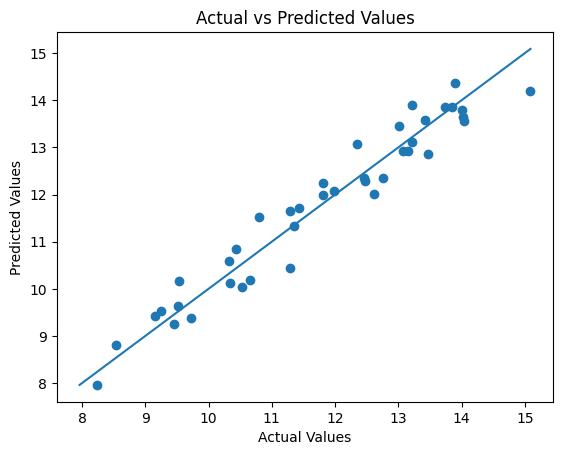

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()

#Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Option -  1
# Set random seed
#np.random.seed(42)

# Generate nonlinear data
#X = np.random.rand(100, 1) * 10
#y = 0.5 * X**2 + 2 * X + 3 + np.random.randn(100, 1) * 5




# Option 2
# Set random seed
np.random.seed(42)

# Generate X
X = np.random.rand(150, 1) * 10

# Mountain-shaped curve (inverted parabola)
# y = -0.8x^2 + 8x + 5 + noise
noise = np.random.randn(150, 1) * 6
y = -0.8 * X**2 + 8 * X + 5 + noise



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train linear regression on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("R²:", r2)


Coefficients: [[ 7.91754881 -0.77425059]]
Intercept: [5.20081069]
MSE: 17.075015532854543
R²: 0.5572168171409808


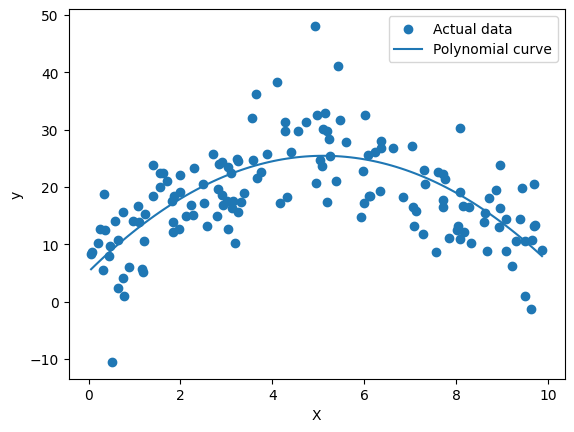

In [ ]:
# Sort X values for smooth curve
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, y, label="Actual data")
plt.plot(X_plot, y_plot, label="Polynomial curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
